Nama    : Zuyyina Hawani


Nim     : 09040620070


Kelas   : Data Mining A

<a id="1"></a> <br>
# 📥 Importing Libraries

import library yang digunakan untuk menjalankan program

In [5]:
import numpy as np
import time
import cv2
import os
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<a id="2"></a> <br> 
# 🗃️ Load Dataset

Mendefinisikan path folder

In [6]:
# Mendefinisikan path ke folder dataset citra
dataset_folder = 'C:/Data Mining/skrips/trpo test/train'

# Mendefinisikan daftar kelas atau label
labels = ['norm', 'trypo']

Inisialisasi data

In [7]:
# Inisialisasi untuk menyimpan data fitur dan target
data_fitur = []
data_target = []

# Resizing gambar yang diinginkan 
width = 256
height = 256

In [8]:
# Load gambar untuk menentukan data training dan target
for label in labels:
    label_folder = os.path.join(dataset_folder, label)
    for image_file in os.listdir(label_folder):
        image_path = os.path.join(label_folder, image_file)
        image = cv2.imread(image_path)
        
        # Resize gambar untuk menentukan ukuran
        image = cv2.resize(image, (width, height))
        data_fitur.append(image)
        data_target.append(label)

# convert ke dalam numpy array
X_train = np.array(data_fitur)
y_train = np.array(data_target)

# Reshape the training data to (num_samples, num_features)
X_train = X_train.reshape(X_train.shape[0], -1)

Total data train yang digunakan

In [9]:
print(X_train.shape)
print(y_train.shape)


(400, 196608)
(400,)


In [10]:
# Memasukan dataset fitur kedalam data frame
df = pd.DataFrame(X_train).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
0,181,153,88,178,151,86,179,152,86,182,...,49,94,83,49,92,82,48,94,85,51
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,135,197,245,133,195,243,133,195,243,134,...,70,33,54,65,26,54,70,14,50,78
4,11,10,12,11,10,11,10,9,11,9,...,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,250,255,211,252,255,211,252,253,211,252
396,249,247,239,248,246,238,249,247,239,248,...,119,92,109,118,106,118,122,112,123,120
397,103,177,216,103,177,216,99,172,212,102,...,58,0,21,63,0,26,73,4,38,90
398,225,241,248,225,241,248,225,241,248,225,...,248,226,244,248,226,244,248,226,244,248


In [11]:
# Tambahkan label menggunakan data target
df['Label'] = y_train
df

,0,1,2,3,4,5,6,7,8,9,...,196599,196600,196601,196602,196603,196604,196605,196606,196607,Label
0,181,153,88,178,151,86,179,152,86,182,...,94,83,49,92,82,48,94,85,51,norm
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,norm
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,norm
3,135,197,245,133,195,243,133,195,243,134,...,33,54,65,26,54,70,14,50,78,norm
4,11,10,12,11,10,11,10,9,11,9,...,12,12,12,12,12,12,12,12,12,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,255,210,253,255,210,252,255,211,251,253,...,255,211,252,255,211,252,253,211,252,trypo
396,249,247,239,248,246,238,249,247,239,248,...,92,109,118,106,118,122,112,123,120,trypo
397,103,177,216,103,177,216,99,172,212,102,...,0,21,63,0,26,73,4,38,90,trypo
398,225,241,248,225,241,248,225,241,248,225,...,226,244,248,226,244,248,226,244,248,trypo


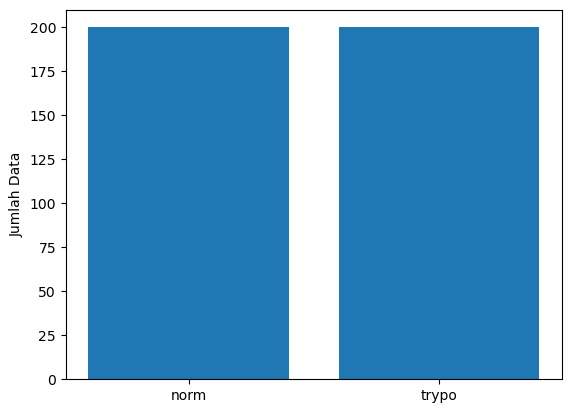

In [12]:
# Menghitung jumlah data untuk setiap nilai target
jumlah_data_target = df['Label'].value_counts()

# Membuat plot bar chart
plt.bar(jumlah_data_target.index, jumlah_data_target.values)

# Memberi label pada sumbu x dan y
plt.xlabel('')
plt.xlabel('')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

<a id="6"></a> <br>
# 📚 Menggunakan Model PCA

Menggunakan PCA untuk reduksi dimensi

In [13]:
# Jumlah fitur yang diinginkan
n_components = 5
pca = PCA(n_components=n_components)
df1 = pca.fit_transform(X_train)

# Cetak hasil PCA
print(df1)

[[ 6.06717754e+02  2.40389517e+03  3.81140515e+03  2.73130021e+02
   1.33540079e+04]
 [-4.53945787e+04  1.70007048e+03 -2.22782056e+01 -1.55855580e+03
   2.94180294e+03]
 [ 3.09678630e+04  4.29776307e+02  6.47129351e+03  6.04161361e+03
   1.32731407e+04]
 ...
 [-9.15590017e+02  8.76656928e+02 -4.26132690e+03 -3.80063239e+02
  -1.50918259e+04]
 [-3.16829081e+04 -4.08615376e+03 -9.31424767e+03 -3.11126619e+03
   1.95013921e+02]
 [ 1.38732525e+04 -4.38888099e+03 -5.80267104e+03  2.10138450e+02
  -9.95362909e+03]]


In [14]:
# Memasukan dataset fitur kedalam data frame
dataset = pd.DataFrame(df1).astype(int)
# Tambahkan label menggunakan data target
dataset['Label'] = y_train
dataset

,0,1,2,3,4,Label
0,606,2403,3811,273,13354,norm
1,-45394,1700,-22,-1558,2941,norm
2,30967,429,6471,6041,13273,norm
3,21847,-8393,611,-3472,-4098,norm
4,48009,-2928,-1121,5551,6152,norm
...,...,...,...,...,...,...
395,-12882,3469,843,515,-938,trypo
396,17203,-1499,-11450,5598,-2212,trypo
397,-915,876,-4261,-380,-15091,trypo
398,-31682,-4086,-9314,-3111,195,trypo


In [15]:
l_gender = LabelEncoder()
dataset['Label'] = l_gender.fit_transform(dataset['Label'])
dataset.head()

,0,1,2,3,4,Label
0,606,2403,3811,273,13354,0
1,-45394,1700,-22,-1558,2941,0
2,30967,429,6471,6041,13273,0
3,21847,-8393,611,-3472,-4098,0
4,48009,-2928,-1121,5551,6152,0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       400 non-null    int32
 1   1       400 non-null    int32
 2   2       400 non-null    int32
 3   3       400 non-null    int32
 4   4       400 non-null    int32
 5   Label   400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [17]:
X = dataset.drop('Label', axis=1)
y = dataset['Label']

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = int(time.time()))

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(320, 5)
(80, 5)
(320,)
(80,)


In [19]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtrain = sc.transform(Xtrain)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_shape=(5,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# fit the keras model on the dataset
history = model.fit(Xtrain, ytrain, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
29/29 [==============================] - 2s 14ms/step - loss: 0.6936 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5139 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6928 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/50
29/29 [=

In [23]:
# evaluate the keras model
_, accuracy = model.evaluate(Xtrain, ytrain)
print('Accuracy Train: %.2f' % (accuracy*100))

 1/10 [==>...........................] - ETA: 0s - loss: 0.6919 - accuracy: 0.5312

10/10 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5125
Accuracy Train: 51.25


In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1024)              33792     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 37281 (145.63 KB)
Trainable params: 37281 (145.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
def plot_training(hist):

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (12, 5))
    # plt.style.use('ggplot')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 70, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 70, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

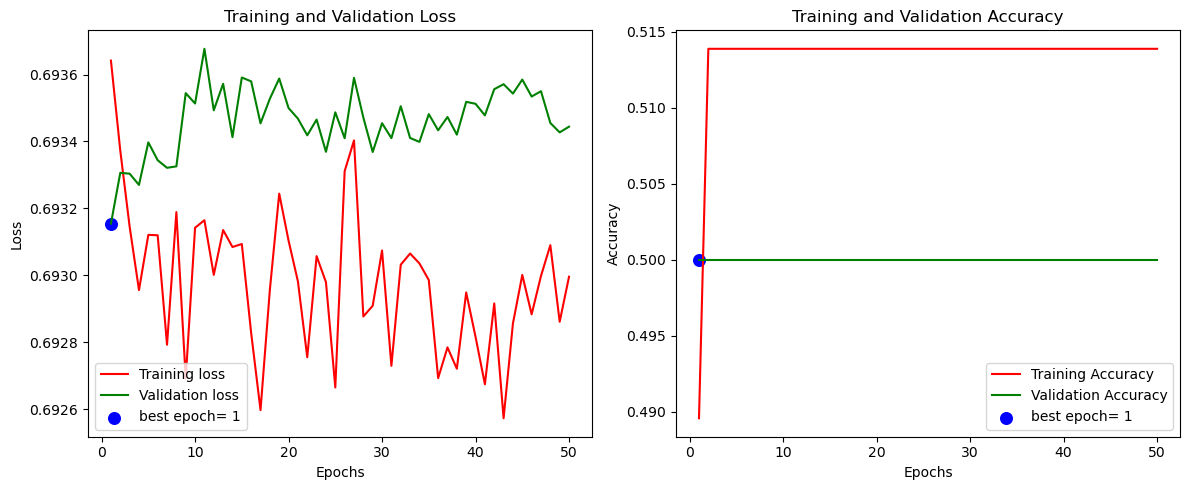

In [26]:
plot_training(history)

In [27]:
from sklearn.metrics import classification_report

predictions = model.predict(Xtest).round()
print(classification_report(ytest, predictions))

3/3 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.53      0.91      0.67        44
           1       0.20      0.03      0.05        36

    accuracy                           0.51        80
   macro avg       0.37      0.47      0.36        80
weighted avg       0.38      0.51      0.39        80

